In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = './data'
out_path = './output'

In [3]:
exam = pd.read_csv(data_path+'/exam.csv')
midwest = pd.read_csv(data_path+'/midwest.csv')
mpg = pd.read_csv(data_path+'/mpg.csv')

# 데이터 가공

## 1 조건에 맞는 데이터 추출하기

In [4]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [5]:
# nclass가 1인 경우만 추출
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [6]:
# nclass가 2인 경우만 추출
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [7]:
# nclass가 1반이 아닌 경우
exam.query('nclass != 1') # != 아니다

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [8]:
# nclass가 3반이 아닌 경우
exam.query('nclass != 3') # != 아니다

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
12,13,4,46,98,65
13,14,4,48,87,12


### 초과, 미만, 이상, 이하 조건 걸기

In [9]:
# 수학 점수가 50을 초과한 경우
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [10]:
# 수학 점수가 50점 미만인 경우
exam.query('math < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
8,9,3,20,98,15
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [11]:
# 영어 점수가 50점 이상인 경우
exam.query('english >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [12]:
# 영어 점수가 80점 이하인 경우
exam.query('english <= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


### 여러 조건을 충족하는 행 추출

In [13]:
# 1반이면서 수학 점수가 50점 이상인 경우
exam.query('nclass ==1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [14]:
# 2반이면서 영어 점수가 80점 이상인 경우
exam.query('nclass == 2 & english >= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


### 여러 조건 중 하나 이상 충족하는 행 추출하기

In [15]:
# 수학 점수가 90점 이상이거나 영어 점수가 90점 이상인 경우
exam.query('math >= 90 | english >= 90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [16]:
# 영어 점수가 90점 미만이거나 과학 점수가 50점 미만인 경우
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


In [17]:
# 문제1 midwest.csv를 불러와 데이터의 특징을 파악하세요
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [18]:
midwest.tail()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
432,3048,WAUKESHA,WI,0.034,304715,8962.205880,298313,1096,672,2699,...,35.396784,7.667090,299802,98.387674,3.121060,3.785820,2.590061,4.085479,1,HLU
433,3049,WAUPACA,WI,0.045,46104,1024.533330,45695,22,125,92,...,16.549869,3.138596,44412,96.330036,8.488697,10.071411,6.953799,10.338641,0,AAR
434,3050,WAUSHARA,WI,0.037,19385,523.918919,19094,29,70,43,...,15.064584,2.620907,19163,98.854785,13.786985,20.050708,11.695784,11.804558,0,AAR
435,3051,WINNEBAGO,WI,0.035,140320,4009.142860,136822,697,685,1728,...,24.995504,5.659847,133950,95.460376,8.804031,10.592031,8.660587,6.661094,1,HAU
436,3052,WOOD,WI,0.048,73605,1533.437500,72157,90,481,722,...,21.666382,4.583725,72685,98.750085,8.525831,11.162997,7.375656,7.882918,0,AAR


In [19]:
midwest.info() # 변수(열,컬럼) 속성 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   poptotal              437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   popasian              437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

In [20]:
midwest.shape

(437, 28)

In [21]:
midwest.describe(include='all')

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
count,437.000000,437,437,437.000000,4.370000e+02,437.000000,4.370000e+02,4.370000e+02,437.000000,437.000000,...,437.000000,437.000000,4.370000e+02,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437
unique,NaN,320,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
top,NaN,MONROE,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAR
freq,NaN,5,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193
mean,1437.338673,NaN,NaN,0.033169,9.613030e+04,3097.742985,8.183992e+04,1.102388e+04,343.109840,1310.464531,...,18.272736,4.447259,9.364228e+04,97.110267,12.510505,16.447464,10.918798,11.389043,0.343249,NaN
std,876.390266,NaN,NaN,0.014679,2.981705e+05,7664.751786,2.001966e+05,7.895827e+04,868.926751,9518.394189,...,6.261908,2.408427,2.932351e+05,2.749863,5.150155,7.228634,5.109166,3.661259,0.475338,NaN
min,561.000000,NaN,NaN,0.005000,1.701000e+03,85.050000,4.160000e+02,0.000000e+00,4.000000,0.000000,...,7.336108,0.520291,1.696000e+03,80.902441,2.180168,1.918955,1.938504,3.547067,0.000000,NaN
25%,670.000000,NaN,NaN,0.024000,1.884000e+04,622.407407,1.863000e+04,2.900000e+01,44.000000,35.000000,...,14.113725,2.997957,1.836400e+04,96.894572,9.198715,11.624088,7.668009,8.911763,0.000000,NaN
50%,1221.000000,NaN,NaN,0.030000,3.532400e+04,1156.208330,3.447100e+04,2.010000e+02,94.000000,102.000000,...,16.797562,3.814239,3.378800e+04,98.169562,11.822313,15.270164,10.007610,10.869119,0.000000,NaN
75%,2059.000000,NaN,NaN,0.038000,7.565100e+04,2330.000000,7.296800e+04,1.291000e+03,288.000000,401.000000,...,20.549893,4.949324,7.284000e+04,98.598636,15.133226,20.351878,13.182182,13.412162,1.000000,NaN


In [22]:
# 문제2 poptotal(전체 인구) 변수를 total로, popasian(아시아 인구) 변수를 asian으로 수정
midwest = midwest.rename(columns={'poptotal' : 'total', 'popasian' : 'asian'})
midwest.head()

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


<Axes: ylabel='Frequency'>

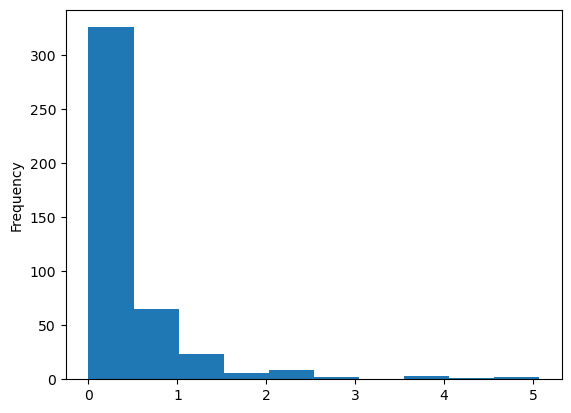

In [23]:
# total, asian 변수를 이용해 '전체 인구 대비 아시아 인구 백분율' 파생변수를 추가하고, 히스토그램을 만들어 분포를 살펴보세요
midwest['ratio'] = (midwest['asian'] / midwest['total'])*100
midwest['ratio'].plot.hist()

In [24]:
# 문제 4 아시아 인구 백분율 전체 평균을 구하고, 평균을 초과하면 'large', 그 외에는 'small'을 부여한 파생변수 생성

In [25]:
# 아시안 인구 백분율의 전체 평균
# len() 사용
asianpopu_avg = round((sum(midwest['ratio'])/len(midwest)),4)
print(asianpopu_avg)

# mean() 사용
asianpopu_avg = round((midwest['ratio'].mean()),4)
print(asianpopu_avg)

0.4872
0.4872


In [26]:
# 파생 변수 생성
midwest['group'] = np.where(midwest['ratio'] > asianpopu_avg,'large','small')
midwest.head()

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,ratio,group
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,0.376759,small
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,0.451722,small
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,0.106731,small
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,0.486918,small
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,0.085675,small


In [27]:
# 문제 5 'large'와 'small'에 해당하는 지역이 얼마나 많은지 빈도표와 빈도 막대 그래프를 만들어 확인
count_group = midwest['group'].value_counts()
count_group

group
small    318
large    119
Name: count, dtype: int64

<Axes: xlabel='group'>

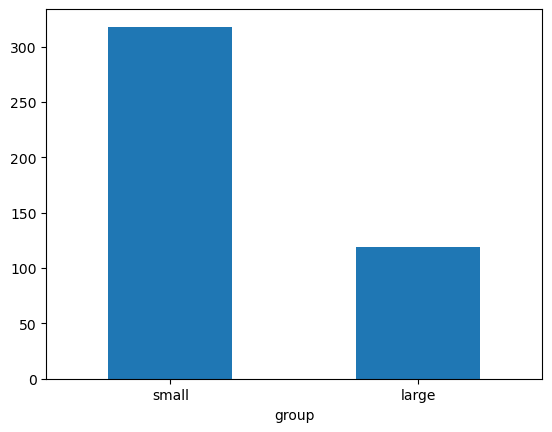

In [28]:
count_group.plot.bar(rot = 0)

## 2 데이터를 추출하는 다양한 방법

### loc,iloc 

In [29]:
df_raw = exam
df_raw.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [30]:
df = df_raw.copy()
df.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [31]:
# 조건을 충족하는 행 추출 (math가 80이상)
df[df['math']>=80]

,id,nclass,math,english,science
6,7,2,80,90,45
7,8,2,90,78,25
17,18,5,80,78,90
18,19,5,89,68,87


In [32]:
# 여러 조건을 충족하는 행 추출(1반이고 math가 50이상)
df[(df['nclass'] == 1) & (df['math'] >= 50)]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [33]:
# 열 추출
df[['id','nclass']]

,id,nclass
0,1,1
1,2,1
2,3,1
3,4,1
4,5,2
5,6,2
6,7,2
7,8,2
8,9,3
9,10,3


In [34]:
# 조건을 충족하는 행에서 열 추출(1반, 수학)
df1 = df[df['nclass']==1]['math'] # 수학 열이 나온다!
print(df1, type(df1), sep = '\n')

0    50
1    60
2    45
3    30
Name: math, dtype: int64
<class 'pandas.core.series.Series'>


In [35]:
# 조건을 충족하는 행에서 여러 열 추출
df[df['nclass']==1][['math','english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


#### df.loc[] 이용하기
- 인덱스를 이용해 데이터 프레임의 행과 열을 추출할 수 있다.

In [36]:
df = pd.DataFrame({'var1' : [1,2,3],
                   'var2' : [4,5,6]},
                   index=['kim','lee','park'])
df

,var1,var2
kim,1,4
lee,2,5
park,3,6


##### 인덱스 문자열을 지정해 행 추출하기

In [37]:
df1 = df.loc['kim'] # 인덱스가 kim인 행 추출
print(df1)
type(df1)

var1    1
var2    4
Name: kim, dtype: int64


pandas.core.series.Series

In [38]:
# 여러 행 추출하기
df.loc[['kim','park']]

,var1,var2
kim,1,4
park,3,6


##### 인덱스 문자열을 지정해 열 추출하기
- []에 쉼표를 입력한 다음 쉼표 앞에는 행을 가리키는 인덱스 문자열,
- 뒤에는 열을 가리키는 변수명을 입력한다.
- 반드시 행 추출 기준도 함께 입력해야 한다.

In [39]:
df.loc['lee','var1'] # lee행의 var1열 추출

2

In [40]:
df1 = df.loc[['kim','lee'], 'var2'] # kim,lee 행의 var2열 추출
print(df1)
type(df1)

kim    4
lee    5
Name: var2, dtype: int64


pandas.core.series.Series

In [41]:
df1 = df.loc[['kim','lee'], ['var2']] # kim,lee 행의 var2열 추출
print(df1)
type(df1)

     var2
kim     4
lee     5


pandas.core.frame.DataFrame

In [42]:
df.loc[:,'var1'] # 모든행의 var1열 추출

kim     1
lee     2
park    3
Name: var1, dtype: int64

##### 인덱스 번호를 지정해 행 추출하기
- 인덱스 문자열이 있는 데이터 프레임은 인덱스 번호로 행을 추출할 수 없다.
- 인덱스 번호로 열은 추출할 수 없다.

In [43]:
df = df_raw.copy()
df.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [44]:
df.loc[0] # 0행이 추출

id          1
nclass      1
math       50
english    98
science    50
Name: 0, dtype: int64

In [45]:
df.loc[2] # 2행 추출

id          3
nclass      1
math       45
english    86
science    78
Name: 2, dtype: int64

In [46]:
type(df.loc[0]) # 행이 1개면 시리즈로 추출

pandas.core.series.Series

In [47]:
a = df.loc[[0]]  # 데이터 프레임으로 추출
print(type(a))
a

<class 'pandas.core.frame.DataFrame'>


,id,nclass,math,english,science
0,1,1,50,98,50


In [48]:
# 여러행 추출하기
df.loc[[0,3,5]] # 0번,3번,5번 행 추출

,id,nclass,math,english,science
0,1,1,50,98,50
3,4,1,30,98,58
5,6,2,50,89,98


In [49]:
# 연속된 여러행 추출하기
df.loc[0:3] # 0 부터 3행까지 연속적으로 추출

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [50]:
type(df.loc[0:3])

pandas.core.frame.DataFrame

In [51]:
df.loc[7:9] # 7에서 9행까지 추출

,id,nclass,math,english,science
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [52]:
df.loc[:2] # 0 생략

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [53]:
df.loc[5:19]

,id,nclass,math,english,science
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
14,15,4,75,56,78


In [54]:
df.loc[5:]

,id,nclass,math,english,science
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
14,15,4,75,56,78


In [55]:
df.loc[:]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


##### 조건을 충족하는 행 추출하기

In [56]:
# nclass가 1이면 추출
df.loc[df['nclass'] == 1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [57]:
# 수학 점수가 60점 이상이면 추출
df.loc[df['math'] >= 60]

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [58]:
# nclass가 1인 행의 math, english 열 추출
df.loc[df['nclass'] == 1,['math','english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


In [59]:
# 0~3행의 math열 추출
df.loc[0:3,'math']

0    50
1    60
2    45
3    30
Name: math, dtype: int64

#### 조건을 충족하는 행 추출방법 비교하기

##### 수학 점수가 50을 초과하는 행 추출하기

In [60]:
# 1) query 함수 사용
df.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [61]:
# 2) [] 사용
df[df['math']>50]

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [62]:
# 3) loc 사용
df.loc[df['math']>50]

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


#### df.iloc[] 이용하기
- 인덱스 번호를 지정해 데이터 프레임의 행과 열을 추출할 수 있다.
- 쉼표를 기준으로 앞에는 행, 뒤에는 열 기준
- df.loc[]와의 차이점은 인덱스 문자열이 아니라 '인덱스 번호'를 입력한다는 점이다.

##### 인덱스 번호를 지정해 행 추출하기

In [63]:
df.iloc[0] # 0행 추출

id          1
nclass      1
math       50
english    98
science    50
Name: 0, dtype: int64

In [64]:
df.iloc[2] # 2행 추출

id          3
nclass      1
math       45
english    86
science    78
Name: 2, dtype: int64

In [65]:
type(df.iloc[0]) # 시리즈로 추출

pandas.core.series.Series

In [66]:
type(df.iloc[[0]]) # 데이터 프레임으로 추출

pandas.core.frame.DataFrame

In [67]:
df.iloc[[0,3,5]] # 0번 3번 5번 행 추출

,id,nclass,math,english,science
0,1,1,50,98,50
3,4,1,30,98,58
5,6,2,50,89,98


##### df.loc[x:y]
- x행 이상 y행 이하 추출

In [68]:
df.loc[1:5] # 1행부터 5행 추출

,id,nclass,math,english,science
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98


##### df.iloc[x:y]
- x행 이상 y행 미만 추출

In [69]:
df.iloc[1:5] # 1~4행 출력

,id,nclass,math,english,science
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [70]:
# 인덱스 문자열이 있는 데이터 프레임
df_label = pd.DataFrame({'var1' : [1,2,3],
                   'var2' : [4,5,6]},
                   index=['kim','lee','park'])
df_label

,var1,var2
kim,1,4
lee,2,5
park,3,6


In [71]:
# 인덱스 문자열만 있으면 인덱스 번호로 행을 추출할 수 없다.
# df_label.loc[0]

In [72]:
df_label.iloc[0]

var1    1
var2    4
Name: kim, dtype: int64

##### 인덱스 번호를 지정해 열 추출하기

In [73]:
df.iloc[:,1] # 모든행의 1열 추출

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    5
17    5
18    5
19    5
Name: nclass, dtype: int64

In [74]:
df.iloc[:,[1]]

,nclass
0,1
1,1
2,1
3,1
4,2
5,2
6,2
7,2
8,3
9,3


In [75]:
df.iloc[:,[1,3]] # 모든 행의 1,3열 추출

,nclass,english
0,1,98
1,1,97
2,1,86
3,1,98
4,2,80
5,2,89
6,2,90
7,2,78
8,3,98
9,3,98


In [76]:
df.iloc[2,3] # 2행 3열 값 추출

86

In [77]:
df.iloc[[2],[3]]

,english
2,86


In [78]:
df.iloc[[0,1],[2,3]] # 0,2행의 2,3열 추출

,math,english
0,50,98
1,60,97


In [79]:
# nclass가 1이면 추출
# iloc는 조건을 지정해 행을 추출할 수 없다.
# df.iloc[df['nclass']==1]

### query - 목록에 해당하는 행 추출하기

In [80]:
# 1,3,5반에 해당하는 것 추출
exam.query('nclass == 1 | nclass ==3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [81]:
# 1,3,5반에 해당하는 것 추출 - 두번째 방법
exam.query('nclass in [1,3,5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


#### 추출한 행으로 데이터 만들기

In [82]:
# nclass가 1인 행을 추출해서 nclassl에 할당
nclass1 = exam.query('nclass == 1')
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [83]:
# nclass가 2인 행을 추출해서 nclass2에 할당
nclass2 = exam.query('nclass == 2')
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [84]:
# 1반의 수학 점수 평균 구하기
nclass1['math'].mean()

46.25

In [85]:
# 2반의 수학 점수 평균 구하기
nclass2['math'].mean()

61.25

#### 문자 변수를 이용해 조건에 맞는 행 추출하기
> query()에 전체 조건을 감싸는 따옴표와 추출할 문자를 감싸는 따옴표를 서로 다른 모양으로 입력해야 한다.

In [86]:
df_str = pd.DataFrame({'sex':['F','M','F','M'],
                   'country': ['Korea','China','Japan','USA']})
df_str

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [87]:
# 전체 조건에 작은 따옴표, 추출할 문자에 큰 따옴표 사용
df_str.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [88]:
df_str.query("sex =='M' & country == 'China'")

,sex,country
1,M,China


In [89]:
# 외부 변수를 이용해서 추출하기
var = 3
exam.query('nclass == @var') # 3반

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [90]:
# mpg 데이타 실습
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [91]:
# 1 자동차 배기량에 따라 고속도로 연비가 다른지 알아보려함.
displ_4 = mpg[mpg['displ'] <= 4]['hwy'].mean()
displ_5 = mpg[mpg['displ'] >= 5]['hwy'].mean()
print(displ_4)
print(displ_5)

25.96319018404908
18.07894736842105


In [92]:
mpg_a = mpg.query('displ <= 4')
mpg_b = mpg.query('displ >= 5')

In [93]:
mpg_a['hwy'].mean()

25.96319018404908

In [94]:
mpg_b['hwy'].mean()

18.07894736842105

In [95]:
audi = mpg[mpg['manufacturer']=='audi']['cty'].mean()
toyota = mpg[mpg['manufacturer']=='toyota']['cty'].mean()
print(audi)
print(toyota)

17.61111111111111
18.529411764705884


In [96]:
mpg_audi = mpg.query('manufacturer == "audi"')
mpg_toyota = mpg.query('manufacturer == "toyota"')

In [97]:
mpg_audi['cty'].mean()

17.61111111111111

In [98]:
mpg_toyota['cty'].mean()

18.529411764705884

In [99]:
hwy_mean = mpg[(mpg['manufacturer']=='chevrolet')|(mpg['manufacturer']=='ford')|(mpg['manufacturer']=='honda')]['hwy'].mean()
print(hwy_mean)

22.50943396226415


In [100]:
hwy_mean = mpg.query('manufacturer in ["chevrolet","ford","honda"]')['hwy'].mean()
print(hwy_mean)

22.50943396226415


### [] - 필요한 변수만 추출하기

#### 변수 추출하기

In [101]:
# math 추출
exam['math']

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [102]:
# 여러 변수 추출하기
exam[['nclass','math','english']]

,nclass,math,english
0,1,50,98
1,1,60,97
2,1,45,86
3,1,30,98
4,2,25,80
5,2,50,89
6,2,80,90
7,2,90,78
8,3,20,98
9,3,50,98


#### 변수 제거하기

In [103]:
exam.drop(columns='math') # math 제거

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65
5,6,2,89,98
6,7,2,90,45
7,8,2,78,25
8,9,3,98,15
9,10,3,98,45


In [104]:
# 여러 변수 제거하기
exam.drop(columns=['math','english'])
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


### pandas 함수 조합하기

#### query() 와 [] 조합하기

In [105]:
# nclass가 1인 행만 추출한 다음 english 추출
exam_1_english = exam.query('nclass == 1')['english']
exam_1_english

0    98
1    97
2    86
3    98
Name: english, dtype: int64

In [106]:
# nclass가 1인 행만 추출한 다음 english 추출
exam_1_english = exam.query('nclass == 1')[['english']]
exam_1_english

,english
0,98
1,97
2,86
3,98


In [107]:
# math가 50 이상인 행만 추출한 다음 id, math 추출
exam.query('math >= 50')[['id','math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [108]:
# math가 50이상인 행만 추출한 당므 id, math 앞부분 5행까지 추출
exam.query('math >= 50')[['id','math']].head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


In [109]:
# math가 50이상인 행만 추출한 다음 id, math 앞부분 10행까지 추출
exam.query('math >= 50')[['id','math']].head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


#### 가독성 있게 코드 줄 바꾸기

In [110]:
# math가 50이상인 행만 추출한 다음 id, math 앞부분 5행까지 추출
exam.query('math >= 50')\
    [['id','math']]\
        .head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


## 3 순서대로 정렬하기

### 오름차순으로 정렬하기

In [111]:
exam.sort_values('math') # math 오름차순 정렬

,id,nclass,math,english,science
8,9,3,20,98,15
4,5,2,25,80,65
3,4,1,30,98,58
2,3,1,45,86,78
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
0,1,1,50,98,50
9,10,3,50,98,45
5,6,2,50,89,98


### 내림차순 정렬하기

In [112]:
exam.sort_values('math',ascending = False) # math 내림차순 정렬

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45
19,20,5,78,83,58
14,15,4,75,56,78
16,17,5,65,68,98
10,11,3,65,65,65
1,2,1,60,97,60
15,16,4,58,98,65


### 여러 정렬 기준 적용하기

In [113]:
exam.sort_values(['nclass','math']) # 순서는 nclass -> math

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
11,12,3,45,85,32


In [114]:
# nclass 오름차순, math 내림차순 정렬
exam.sort_values(['nclass','math'], ascending=[True,False])

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


## 4 파생변수 추가하기

In [115]:
# total 변수 추가
exam.assign(total= exam['math']+exam['english']+exam['science'])
exam['total'] = exam['math'] + exam['english'] + exam['science']

In [116]:
exam = exam.drop(columns='total')

### 여러 파생변수 한 번에 추가하기

In [117]:
exam.assign(total= exam['math']+exam['english']+exam['science'],
            mean = (exam['math']+exam['english']+exam['science'])/3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


### assign()에 np.where() 적용하기

In [118]:
exam.assign(test = np.where(exam['science'] >=60, 'pass', 'fall'))

,id,nclass,math,english,science,test
0,1,1,50,98,50,fall
1,2,1,60,97,60,pass
2,3,1,45,86,78,pass
3,4,1,30,98,58,fall
4,5,2,25,80,65,pass
5,6,2,50,89,98,pass
6,7,2,80,90,45,fall
7,8,2,90,78,25,fall
8,9,3,20,98,15,fall
9,10,3,50,98,45,fall


### 추가한 변수를 pandas 함수에 바로 활용하기

In [119]:
# total 변수 추가, total 기준으로 오름차순 정렬
exam.assign(total = exam['math']+exam['english']+exam['science'])\
    .sort_values('total')

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
9,10,3,50,98,45,193
7,8,2,90,78,25,193
10,11,3,65,65,65,195
0,1,1,50,98,50,198
2,3,1,45,86,78,209


### lambda 이용해 데이터 프레임명 줄여쓰기

In [120]:
long_name = exam.copy()
long_name.assign(new = long_name['math'] + long_name['english'] + long_name['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [121]:
# 람다 사용
long_name.assign(new = lambda x: x['math'] + x['english'] + x['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


### 앞에서 만든 변수를 활용해 다시 변수 만들기
- 반드시 lambda를 이용해 데이터 프레임명을 약어로 입력

In [122]:
long_name.assign(total = long_name['math'] + long_name['english'] + long_name['science'],
                 mean = lambda x : x['total']/3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [123]:
long_name.assign(total = lambda x : x['math'] + x['english'] + x['science'],
                 mean = lambda x : x['total']/3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


## 5 집단별로 요약하기

In [124]:
# math 평균 구하기
exam.agg(mean_math = ('math', 'mean'))
exam['math'].mean()

57.45

In [125]:
exam['math'].mean()

57.45

In [126]:
# nclass별로 분리하고 math의 평균을 구하기
exam.groupby('nclass').agg(mean_math = ('math','mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [127]:
exam.groupby('nclass')['math'].mean()

nclass
1    46.25
2    61.25
3    45.00
4    56.75
5    78.00
Name: math, dtype: float64

In [128]:
exam.groupby('nclass', as_index = False).agg(mean_math = ('math','mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


### 여러 요약 통계량 한 번에 구하기

In [129]:
exam.groupby('nclass')\
    .agg(mean_math = ('math','mean'),
         sum_math = ('math','sum'),
         median_math = ('math','median'),
         n = ('nclass','count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


In [130]:
exam.groupby('nclass',as_index=False)\
    .agg(mean_math = ('math','mean'),
         sum_math = ('math','sum'),
         median_math = ('math','median'),
         n = ('nclass','count'))

,nclass,mean_math,sum_math,median_math,n
0,1,46.25,185,47.5,4
1,2,61.25,245,65.0,4
2,3,45.00,180,47.5,4
3,4,56.75,227,53.0,4
4,5,78.00,312,79.0,4


### 모든 변수의 요약 통계량 한 번에 구하기

In [131]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


### 집단별로 다시 집단 나누기

In [132]:
# 제조회사 및 구동방식별 분리, cty 평균 구하기
mpg.groupby(['manufacturer','drv'])\
.agg(mean_cty = ('cty','mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [133]:
# audi의 drv별 빈도
mpg.query('manufacturer =="audi"')\
    .groupby(['drv'])\
        .agg(count_drv = ('drv','count'))

,count_drv
drv,
4,11
f,7


### value_counts()로 집단별 빈도 간단하게 구하기

In [134]:
mpg_S = mpg['drv'].value_counts()

In [135]:
print(type(mpg_S))
mpg_S

<class 'pandas.core.series.Series'>


drv
f    106
4    103
r     25
Name: count, dtype: int64

In [136]:
mpg[mpg['manufacturer'] == 'audi'].value_counts('drv')

drv
4    11
f     7
Name: count, dtype: int64

### pandas 함수 조합하기
- 제조회사별로 'suv' 자동차의 도시 및 고속도로 합산 연비 평균을 구해 내림차순으로 정렬하고, 1~5위까지 출력하기

In [137]:
mpg.query('category == "suv"')\
.assign(total = (mpg['hwy']+mpg['cty']) / 2)\
        .groupby('manufacturer')\
                .agg(mean_total = ('total','mean'))\
                .sort_values('mean_total',ascending=False)\
                .head()

,mean_total
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


In [138]:
mpg_group = mpg.query('category == "suv"')\
.assign(total = (mpg['hwy']+mpg['cty']) / 2).groupby('manufacturer')

In [139]:
mpg_group

In [140]:
new_mpg = mpg[['category','cty']]
new_mpg.head()

,category,cty
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16


In [141]:
new_mpg.query('category == "suv"').agg(mean = ('cty','mean'))

,cty
mean,13.5


In [142]:
new_mpg.query('category == "compact"').agg(mean = ('cty','mean'))

,cty
mean,20.12766


In [143]:
new_mpg[new_mpg['category']=='suv']['cty'].mean()

13.5

In [144]:
new_mpg[new_mpg['category']=='compact']['cty'].mean()

20.127659574468087

In [145]:
mpg_audi = mpg.loc[mpg['manufacturer']=='audi','hwy']\
    .sort_values(ascending=False)
print(type(mpg_audi))
mpg_audi

<class 'pandas.core.series.Series'>


2     31
3     30
0     29
1     29
9     28
6     27
10    27
5     26
7     26
4     26
8     25
11    25
12    25
13    25
14    25
16    25
15    24
17    23
Name: hwy, dtype: int64

In [146]:
mpg_audi_df = mpg_audi.reset_index() # 필요한 경우 선택적으로 열 이름을 바꿉니다. 
mpg_audi_df.columns = ['index','hwy'] 
mpg_audi_df.head()

,index,hwy
0,2,31
1,3,30
2,0,29
3,1,29
4,9,28


In [147]:
type(mpg_audi_df)

pandas.core.frame.DataFrame

In [148]:
mpg_audi_df = mpg_audi.to_frame().reset_index(drop=True)
mpg_audi_df.head()

,hwy
0,31
1,30
2,29
3,29
4,28


In [149]:
mpg.loc[mpg['manufacturer']=='audi']\
.sort_values('hwy',ascending=False)\
.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [150]:
mpg.query('manufacturer == "audi"')\
.sort_values('hwy',ascending=False)\
.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [151]:
mpg_copy = mpg.copy()

In [152]:
mpg_copy = mpg_copy.assign(total= mpg_copy['cty'] + mpg_copy['hwy'])

In [153]:
mpg_copy = mpg_copy.assign(total_mean = mpg_copy['total']/2)
mpg_copy.sort_values('total_mean',ascending=False).head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,total_mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [154]:
mpg.assign(total = mpg['cty'] + mpg['hwy'],\
           total_mean = lambda x : x['total']/2)\
           .sort_values('total_mean',ascending=False)\
           .head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,total_mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [155]:
mpg.assign(total = lambda x : x['cty'] + x['hwy'],\
           total_mean = lambda x : x['total']/2)\
           .sort_values('total_mean',ascending=False)\
           .head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,total_mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [156]:
filtered_mpg = mpg.loc[(mpg['category'] == 'suv')| (mpg['category'] == 'compact')]
filtered_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
216,volkswagen,jetta,2.0,2008,4,manual(m6),f,21,29,p,compact
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact


In [157]:
filtered_mpg = mpg.loc[mpg['category'].isin(['suv','compact'])]
filtered_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
216,volkswagen,jetta,2.0,2008,4,manual(m6),f,21,29,p,compact
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact


In [158]:
filtered_mpg = mpg.groupby('category')\
.agg(mean_cty = ('cty','mean'))
filtered_mpg

,mean_cty
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


In [159]:
mpg.groupby('category')\
.agg(mean_cty = ('hwy','mean'))\
.sort_values('mean_cty',ascending=False)

,mean_cty
category,
compact,28.297872
subcompact,28.142857
midsize,27.292683
2seater,24.800000
minivan,22.363636
suv,18.129032
pickup,16.878788


In [160]:
filtered_mpg.sort_values('mean_cty',ascending=False)

,mean_cty
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


In [161]:
mpg.groupby('manufacturer')\
.agg(cty_mean = ('hwy','mean'))\
.head(3)

,cty_mean
manufacturer,
audi,26.444444
chevrolet,21.894737
dodge,17.945946


In [162]:
mpg.loc[mpg['category']=='compact']\
.groupby('manufacturer')\
.agg(count = ('manufacturer','count'))\
.sort_values('count',ascending=False)

,count
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


## 혼자서 해보기

In [163]:
# 1
new_mpg = mpg[['category','cty']]
new_mpg.head()

,category,cty
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16


In [164]:
# 2
new_mpg.query('category == "suv"')['cty'].mean()

13.5

In [165]:
new_mpg.query('category == "compact"')['cty'].mean()

20.127659574468087

In [166]:
new_mpg.query('category in ["suv","compact"]')\
.groupby('category')\
.agg(mean_cty = ('cty','mean'))

,mean_cty
category,
compact,20.12766
suv,13.50000


In [167]:
# 53p 문제
mpg.query('manufacturer == "audi"')\
.sort_values('hwy',ascending=False)\
.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [168]:
# p62 문제 1
mpg_copy = mpg.copy()
mpg_copy.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [169]:
mpg_copy = mpg_copy.assign(total = mpg_copy['cty'] + mpg_copy['hwy'])

In [170]:
# 2 
mpg_copy = mpg_copy.assign(mean = mpg_copy['total']/2)

In [171]:
# 3
mpg_copy.sort_values('mean',ascending=False).head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [172]:
# 4
mpg.assign(total = lambda x : x['cty'] + x['hwy'],\
                mean = lambda x : x['total']/2)\
                .sort_values('mean',ascending=False)\
                .head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [173]:
# p79 문제 1
mpg.groupby('category')\
.agg(cty_mean = ('cty','mean'))

,cty_mean
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


In [174]:
# 2
mpg.groupby('category')\
.agg(cty_mean = ('cty','mean'))\
.sort_values('cty_mean',ascending=False)

,cty_mean
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


In [175]:
# 3 
mpg.groupby('manufacturer')\
.agg(hwy_mean = ('hwy','mean'))\
.sort_values('hwy_mean',ascending=False)\
.head(3)

,hwy_mean
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


In [176]:
mpg.query('category == "compact"')\
          .groupby('manufacturer')\
          .agg(count = ('category','count'))\
          .sort_values('count',ascending=False)
          

,count
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [177]:
mpg.query('category == "compact"')\
.value_counts('manufacturer')

manufacturer
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
Name: count, dtype: int64

In [178]:
type(mpg.query('category == "compact"')\
.value_counts('manufacturer'))

pandas.core.series.Series

## 6 데이터 합치기

### 가로로 합치기

In [179]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id' : [1,2,3,4,5],
                      'midterm' : [60,80,70,90,85]})
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [180]:
# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id' : [1,2,3,4,5],
                      'final' : [70,83,65,95,80]})
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [181]:
# id를 기준으로 합쳐서 total에 할당
total = pd.merge(test1, test2, how ='left' ,on='id')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


#### 다른 데이터를 활용해 변수 추가하기

In [182]:
# 반별 담임교사 명단 데이터
name = pd.DataFrame({'nclass' : [1,2,3,4,5],
                     'teacher' : ['kim','lee','park','choi','jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [183]:
# nclass 기준으로 합쳐서 exam_new에 할당
exam_new = pd.merge(exam,name,how = 'left', on = 'nclass')
exam_new

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


### 세로로 합치기

In [184]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id' : [1,2,3,4,5],
                        'test' : [60,80,70,90,85]})
group_a

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [185]:
# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id' : [6,7,8,9,10],
                        'test' : [70,83,65,95,80]})
group_b

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [186]:
# 데이터를 합쳐서 group_all에 할당
group_all = pd.concat([group_a,group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [187]:
group_all = pd.concat([group_a,group_b],ignore_index=True)
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


In [188]:
group_all.reset_index(drop=True, inplace=True)
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


### 문제(94p)

In [189]:
fuel = pd.DataFrame({'fl' : ['c','d','e','p','r'],
                     'price_fl' : [2.35,2.38,2.11,2.76,2.22]})
fuel

,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,2.76
4,r,2.22


In [190]:
# mpg에 연료 가격 변수 추가(가로 합치기 기능)
mpg = pd.merge(mpg,fuel,how='left',on = 'fl')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76


In [191]:
mpg[['model','fl','price_fl']].head()

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76
